In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
arial = pd.read_csv('fonts/arial.csv')
arial

,font,fontVariant,m_label,strength,italic,orientation,m_top,m_left,originalH,originalW,...,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,ARIAL,scanned,48,0.4,0,0.0,0,0,15,25,...,255,255,255,154,1,1,1,1,1,1
1,ARIAL,scanned,50,0.4,0,0.0,0,0,18,11,...,213,225,229,239,240,240,221,209,116,95
2,ARIAL,scanned,83,0.4,0,0.0,0,0,13,10,...,255,255,255,255,255,255,1,1,1,1
3,ARIAL,scanned,48,0.4,0,0.0,0,0,15,18,...,1,1,1,1,1,1,1,1,1,1
4,ARIAL,scanned,54,0.4,0,0.0,0,0,14,30,...,255,255,255,255,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26232,ARIAL,ARIAL,37,0.7,1,0.0,32,26,50,52,...,1,1,16,161,255,255,208,83,4,1
26233,ARIAL,ARIAL,36,0.7,1,0.0,30,24,58,36,...,1,1,1,1,1,1,1,1,1,1
26234,ARIAL,ARIAL,35,0.7,1,0.0,33,23,48,37,...,255,255,253,77,1,1,1,1,1,1
26235,ARIAL,ARIAL,34,0.7,1,0.0,33,30,17,24,...,43,255,255,255,255,213,1,1,1,1


In [3]:
# Select columns corresponding to images, i.e. r0c0,r0c1,...,r19c19
col = []

for i in range(20):
    for j in range(20):
        col.append('r'+str(i)+'c'+str(j))

font_df = arial[col]
data = np.array(font_df,'f')

# For speed, we take only first 100 images
data = data[:100]

# Save the data to a txt for convenience
np.savetxt('arial_data.txt',data)

In [4]:
# Function for displaying i-th image
def display_image(data,i,h,w):
    plt.figure()
    im = data[i].reshape((h,w))
    plt.gray()
    plt.imshow(im)

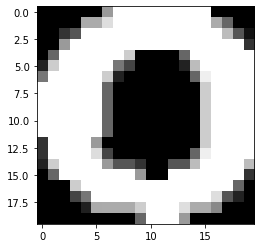

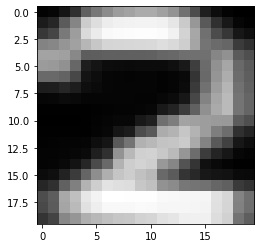

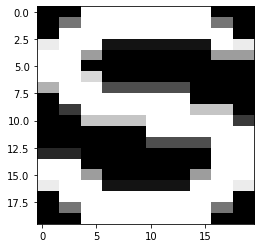

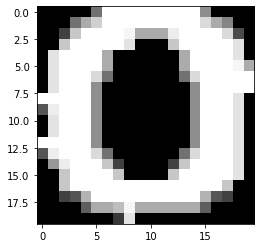

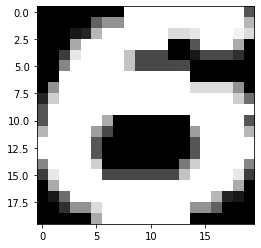

In [5]:
# Display first five images

for i in range(5):
    display_image(data,i,20,20)
    
plt.show()

In [6]:
# Package for clustering
from scipy.cluster.vq import *

In [7]:
# Do clustering with different number of clusters
n_cluster = 0
centroids = []
variance = 100000
for i in range(1,41):
    c,v = kmeans(data,i)
    if v < variance:
        centroids = c
        variance = v
        n_cluster = i
        
print('Best result:')
print(f'Number of clusters: {n_cluster}')
print(f'Variance: {variance}')

Best result:
Number of clusters: 40
Variance: 682.4012451171875


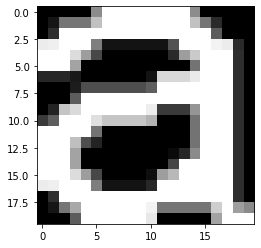

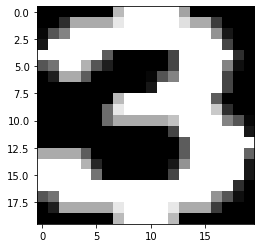

In [8]:
# Display images in first cluster

code,_ = vq(data,centroids)
ndx = np.where(code==0)[0]

for i in range(np.minimum(5,len(ndx))):
    display_image(data,ndx[i],20,20)
    
plt.show()

In [9]:
# Package for PCA
from sklearn.decomposition import PCA

In [10]:
# Apply PCA with 100 principal components

pca = PCA(n_components=100)
data_pca = pca.fit_transform(data)

# Use new dataset for clustering
n_cluster = 0
centroids = []
variance = 100000
for i in range(1,21):
    c,v = kmeans(data_pca,i)
    if v < variance:
        centroids = c
        variance = v
        n_cluster = i
        
print('Best result:')
print(f'Number of clusters: {n_cluster}')
print(f'Variance: {variance}')

Best result:
Number of clusters: 20
Variance: 1006.62255859375
